In [1]:
# Import necessary libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import re
from math import ceil
from sklearn.model_selection import train_test_split
import warnings

In [3]:
pd.options.display.max_columns = None
%matplotlib inline


# Importing Data set
To begin, we'll examine the initial rows and forms of datasets.
# Car Dekho Data set

In [4]:
car = pd.read_csv('Car-details-v3.csv')
test = pd.read_csv('Car-details-v3.csv')

In [5]:
car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [6]:
# check the shape of data
car.shape

(8128, 13)

In [7]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [8]:
car.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0
8127,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [9]:
car.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [10]:
# Non-Null Count values:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [11]:
car.columns


Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [12]:
print(car['seller_type'].unique())
print(car['transmission'].unique())
print(car['owner'].unique())

['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']


In [13]:
car.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [14]:
car.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

In [15]:
# Data Overview
car.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [16]:
car.sort_values(by = 'km_driven')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
7913,Maruti Eeco 5 STR With AC Plus HTR CNG,2011,209000,1,CNG,Individual,Manual,Fourth & Above Owner,15.1 km/kg,1196 CC,73 bhp,101Nm@ 3000rpm,5.0
7429,Maruti Swift LXI,2020,445000,1000,Petrol,Individual,Manual,First Owner,21.21 kmpl,1197 CC,81.80 bhp,113Nm@ 4200rpm,5.0
2963,Maruti Swift AMT VXI,2020,654000,1000,Petrol,Individual,Automatic,First Owner,21.21 kmpl,1197 CC,81.80 bhp,113Nm@ 4200rpm,5.0
7492,Hyundai Santro Magna,2020,500000,1000,Petrol,Individual,Manual,First Owner,20.3 kmpl,1086 CC,68.07 bhp,99.07Nm@ 4500rpm,5.0
399,Honda City i-VTEC CVT V,2018,1085000,1000,Petrol,Individual,Automatic,First Owner,18.0 kmpl,1497 CC,117.6 bhp,145Nm@ 4600rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6673,Toyota Innova 2.5 EV Diesel PS 7 Seater BSIII,2011,350000,500000,Diesel,Individual,Manual,Second Owner,12.99 kmpl,2494 CC,100.57 bhp,200Nm@ 1400-3400rpm,7.0
3641,Maruti Wagon R VXI BS IV,2011,229999,500000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
3508,Maruti Wagon R LXI Minor,2010,194000,577414,Petrol,Individual,Manual,Second Owner,18.9 kmpl,1061 CC,67 bhp,84Nm@ 3500rpm,5.0
1810,Mahindra XUV500 W6 2WD,2012,500000,1500000,Diesel,Individual,Manual,First Owner,15.1 kmpl,2179 CC,140 bhp,330Nm@ 1600-2800rpm,7.0


In [17]:
car.dropna()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [18]:
car['mileage'].fillna(0, inplace=True)

In [19]:
car['engine'].fillna(0, inplace=True)
car['max_power'].fillna(0, inplace=True)
car['torque'].fillna(0, inplace=True)
car['seats'].fillna(0, inplace=True)

In [20]:
car.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [21]:

car.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,8128.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.269439
std,4.044249,8.062534e+05,5.655055e+04,1.293039
min,1983.000000,2.999900e+04,1.000000e+00,0.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [22]:
car.name.value_counts()

Maruti Swift Dzire VDI                             129
Maruti Alto 800 LXI                                 82
Maruti Alto LXi                                     71
BMW X4 M Sport X xDrive20d                          62
Maruti Swift VDI                                    61
                                                  ... 
Skoda Fabia 1.4 TDI Ambiente                         1
Mahindra Scorpio VLX 2WD AT BSIII                    1
Renault KWID Climber 1.0 AMT                         1
Mahindra XUV300 W8 Option Dual Tone Diesel BSIV      1
Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV         1
Name: name, Length: 2058, dtype: int64

In [23]:
print(car['fuel'].unique())

['Diesel' 'Petrol' 'LPG' 'CNG']


In [24]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas

<AxesSubplot:xlabel='owner', ylabel='selling_price'>

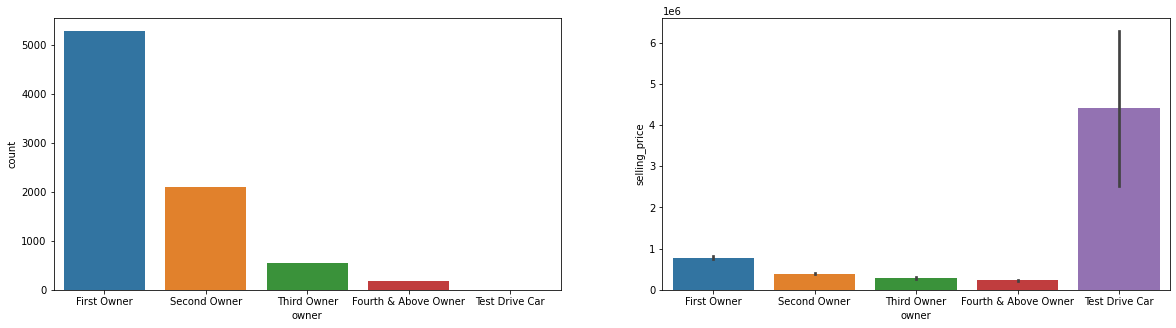

In [26]:

fig, (axis1,axis2)=plt.subplots(1,2,figsize=(20,5))
sns.countplot(x="owner",data=car,ax=axis1)
sns.barplot(x="owner",y="selling_price",data=car,ax=axis2)

   #    The number of respective owners and the selling price at which they are selling their graphs has a similar graph.

<AxesSubplot:xlabel='seller_type', ylabel='selling_price'>

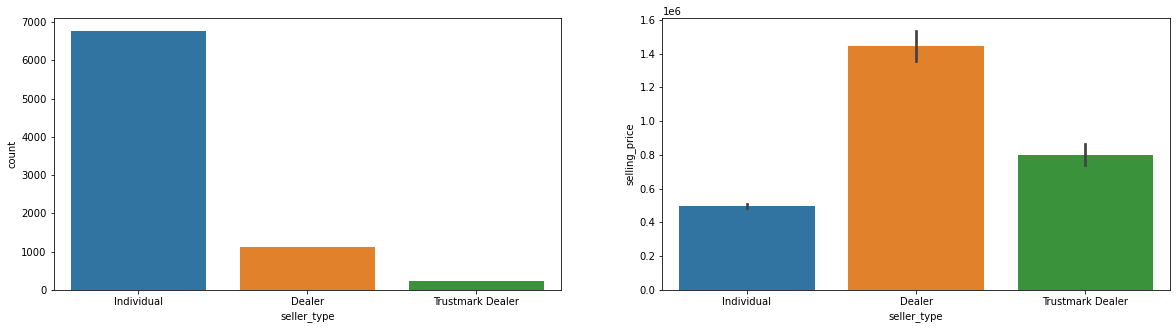

In [27]:
fig, (axis1,axis2) = plt.subplots(1, 2, figsize = (20,5))
sns.countplot(x="seller_type", data=car, ax=axis1)
sns.barplot(x="seller_type", y="selling_price",data=car, ax=axis2 )
# Number of Indiviual sellers is the highest but Trustmark dealers are selling the cars for the highest price

# Number of Indiviual sellers is the highest but Trustmark dealers are selling the cars for the highest price


<AxesSubplot:xlabel='km_driven', ylabel='selling_price'>

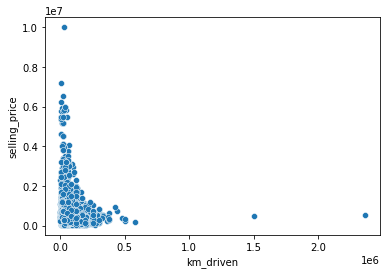

In [28]:
sns.scatterplot(data=car,x="km_driven",y="selling_price")

<AxesSubplot:xlabel='transmission', ylabel='selling_price'>

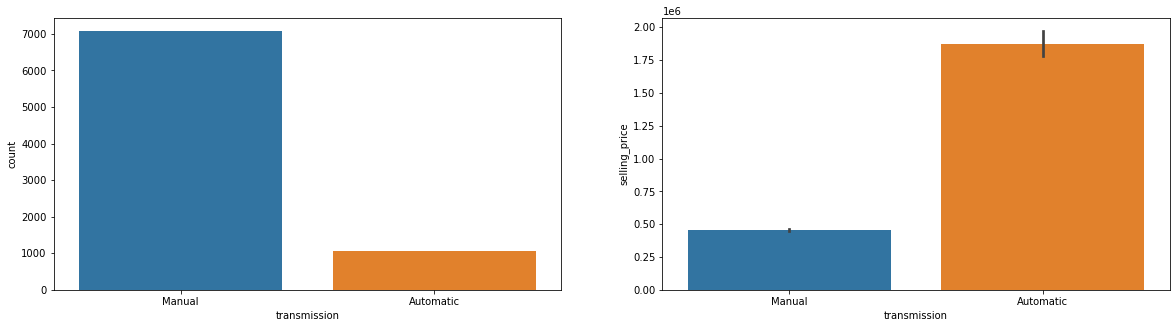

In [29]:
fig, (axis1,axis2)=plt.subplots(1,2,figsize=(20,5))
sns.countplot(x="transmission",data=car,ax=axis1)
sns.barplot(x="transmission",y="selling_price",data=car,ax=axis2)

# Number of manual cars being sold is more than automatic, but automatic cars sells at a higher price

<AxesSubplot:xlabel='age', ylabel='selling_price'>

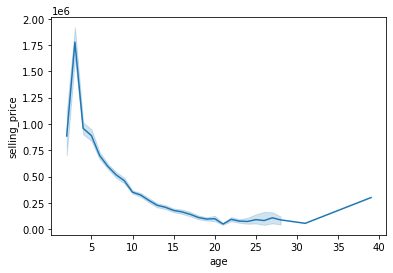

In [30]:
car["age"] = 2022-car["year"]
sns.lineplot(data=car,x="age",y="selling_price")

  #      Newer cars sell for higher prices.

<AxesSubplot:xlabel='fuel', ylabel='selling_price'>

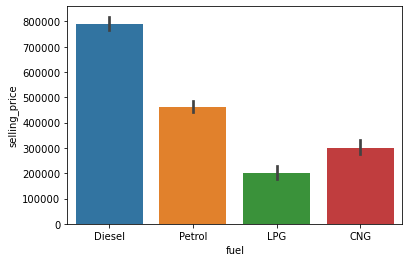

In [31]:
sns.barplot(data=car,x="fuel",y="selling_price")

Diesel cars have the most selling price folowed by petrol.

<AxesSubplot:xlabel='fuel', ylabel='count'>

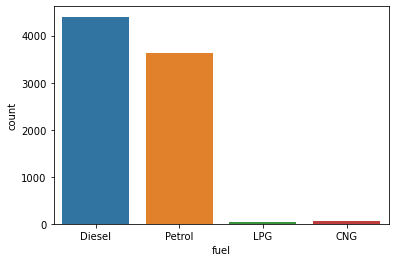

In [32]:
sns.countplot(data=car,x="fuel")

The majority of automobiles sold are diesel, followed by gasoline.

<AxesSubplot:xlabel='seller_type,owner,transmission'>

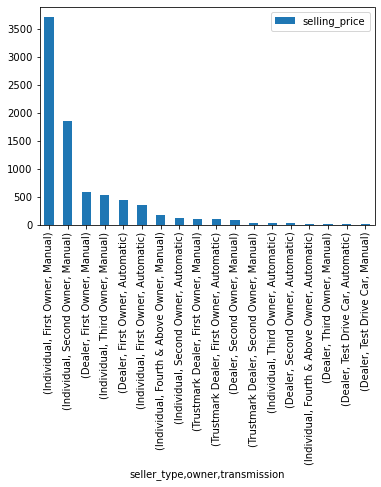

In [33]:
df_seller_owner = car.groupby(by=["seller_type","owner","transmission"])
df_seller_owner.count().sort_values(by="selling_price", ascending=False).plot(kind="bar", y="selling_price")

In [34]:
df_cardekho = pd.get_dummies(car,columns=['fuel','transmission','seller_type',"owner"],drop_first=True)
df_cardekho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          8128 non-null   object 
 1   year                          8128 non-null   int64  
 2   selling_price                 8128 non-null   int64  
 3   km_driven                     8128 non-null   int64  
 4   mileage                       8128 non-null   object 
 5   engine                        8128 non-null   object 
 6   max_power                     8128 non-null   object 
 7   torque                        8128 non-null   object 
 8   seats                         8128 non-null   float64
 9   age                           8128 non-null   int64  
 10  fuel_Diesel                   8128 non-null   uint8  
 11  fuel_LPG                      8128 non-null   uint8  
 12  fuel_Petrol                   8128 non-null   uint8  
 13  tra

In [35]:
df_cardekho.head()

,name,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,age,fuel_Diesel,fuel_LPG,fuel_Petrol,transmission_Manual,seller_type_Individual,seller_type_Trustmark Dealer,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti Swift Dzire VDI,2014,450000,145500,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,8,1,0,0,1,1,0,0,0,0,0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,8,1,0,0,1,1,0,0,1,0,0
2,Honda City 2017-2020 EXi,2006,158000,140000,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,16,0,0,1,1,1,0,0,0,0,1
3,Hyundai i20 Sportz Diesel,2010,225000,127000,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,12,1,0,0,1,1,0,0,0,0,0
4,Maruti Swift VXI BSIII,2007,130000,120000,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,15,0,0,1,1,1,0,0,0,0,0


In [36]:
df_cardekho.drop("engine",axis=1,inplace=True)

In [37]:
df_cardekho.drop("max_power",axis=1,inplace=True)

In [38]:
df_cardekho.drop("torque",axis=1,inplace=True)

In [39]:
df_cardekho.head()

,name,year,selling_price,km_driven,mileage,seats,age,fuel_Diesel,fuel_LPG,fuel_Petrol,transmission_Manual,seller_type_Individual,seller_type_Trustmark Dealer,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti Swift Dzire VDI,2014,450000,145500,23.4 kmpl,5.0,8,1,0,0,1,1,0,0,0,0,0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,21.14 kmpl,5.0,8,1,0,0,1,1,0,0,1,0,0
2,Honda City 2017-2020 EXi,2006,158000,140000,17.7 kmpl,5.0,16,0,0,1,1,1,0,0,0,0,1
3,Hyundai i20 Sportz Diesel,2010,225000,127000,23.0 kmpl,5.0,12,1,0,0,1,1,0,0,0,0,0
4,Maruti Swift VXI BSIII,2007,130000,120000,16.1 kmpl,5.0,15,0,0,1,1,1,0,0,0,0,0


Individual categorical fields have been converted into numerical data, for example, field "fuel" is now divided into fields fuel petrol, fuel diesel, fuel CNG, and so on.

# Linear Regression
Before we begin working on the linear regression model, we divide our data into test and training sets.

In [40]:
#importing requirements

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor


In [41]:
#splitting the data

(Y, X) = (df_cardekho['selling_price'].values, df_cardekho.drop(['selling_price','name'], axis = 1))
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size = 0.3)


In [42]:
# Training the model and calculating percentage of error

lr = LinearRegression()
lr.fit(X_train,Y_train)
predicted_prices = lr.predict(X_test)

def mean_absolute_percentage_error(Y_test,predicted_prices): 
    return np.mean(np.abs((Y_test-predicted_prices) / Y_test)) * 100
mean_absolute_percentage_error(Y_test,predicted_prices)

ValueError: could not convert string to float: '22.05 kmpl'

In [ ]:
#splitting the data
(B, A) = (df_cardekho['selling_price'].values, df_cardekho.drop(['selling_price','name','fuel_LPG', 'year'], axis = 1))
B = B.reshape((-1,1))
(A_train, A_test, B_train, B_test) = train_test_split(A, B, test_size = 0.3)

In [ ]:
lr = LinearRegression()
lr.fit(A_train,B_train)
predicted_prices = lr.predict(A_test)

def mean_absolute_percentage_error(B_test,predicted_prices): 
    return np.mean(np.abs((B_test-predicted_prices) / B_test)) * 100
mean_absolute_percentage_error(B_test,predicted_prices)

We get a slightly better error percentage,by removing fields like 'selling_price','km_driven','owner_Third Owner','owner_Fourth','Above Owner',fuel_Petrol','name,''fuel_LPG'and'year'.

Let us further try to improve on the accuracy of our model by feature selection, the criteria for it would be based on the EDA we have done before

In [ ]:
#splitting the data
(B, A) = (df_cardekho['selling_price'].values, df_cardekho.drop(['selling_price','km_driven','owner_Third Owner','owner_Fourth & Above Owner','fuel_Petrol','fuel_Diesel','name','fuel_LPG', 'year'], axis = 1))
B = B.reshape((-1,1))
(A_train, A_test, B_train, B_test) = train_test_split(A, B, test_size = 0.3)

In [ ]:
lr = LinearRegression()
lr.fit(A_train,B_train)
predicted_prices = lr.predict(A_test)

def mean_absolute_percentage_error(B_test,predicted_prices): 
    return np.mean(np.abs((B_test-predicted_prices) / B_test)) * 100
mean_absolute_percentage_error(B_test,predicted_prices)

By using feature selection we got our error percentage down from 74% to 65%, let's see if changing the model affects our error percentage positively